# Code for generating plots specifically for presentation

## To Generate

- Effect of scaling
- Distribution of MSE

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, normalize, RobustScaler
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use("seaborn-v0_8-colorblind")

## Effect of Scaling

Unscaled Skewness: 109.89076279316187
Scaled Skewness: 0.9485399736343858


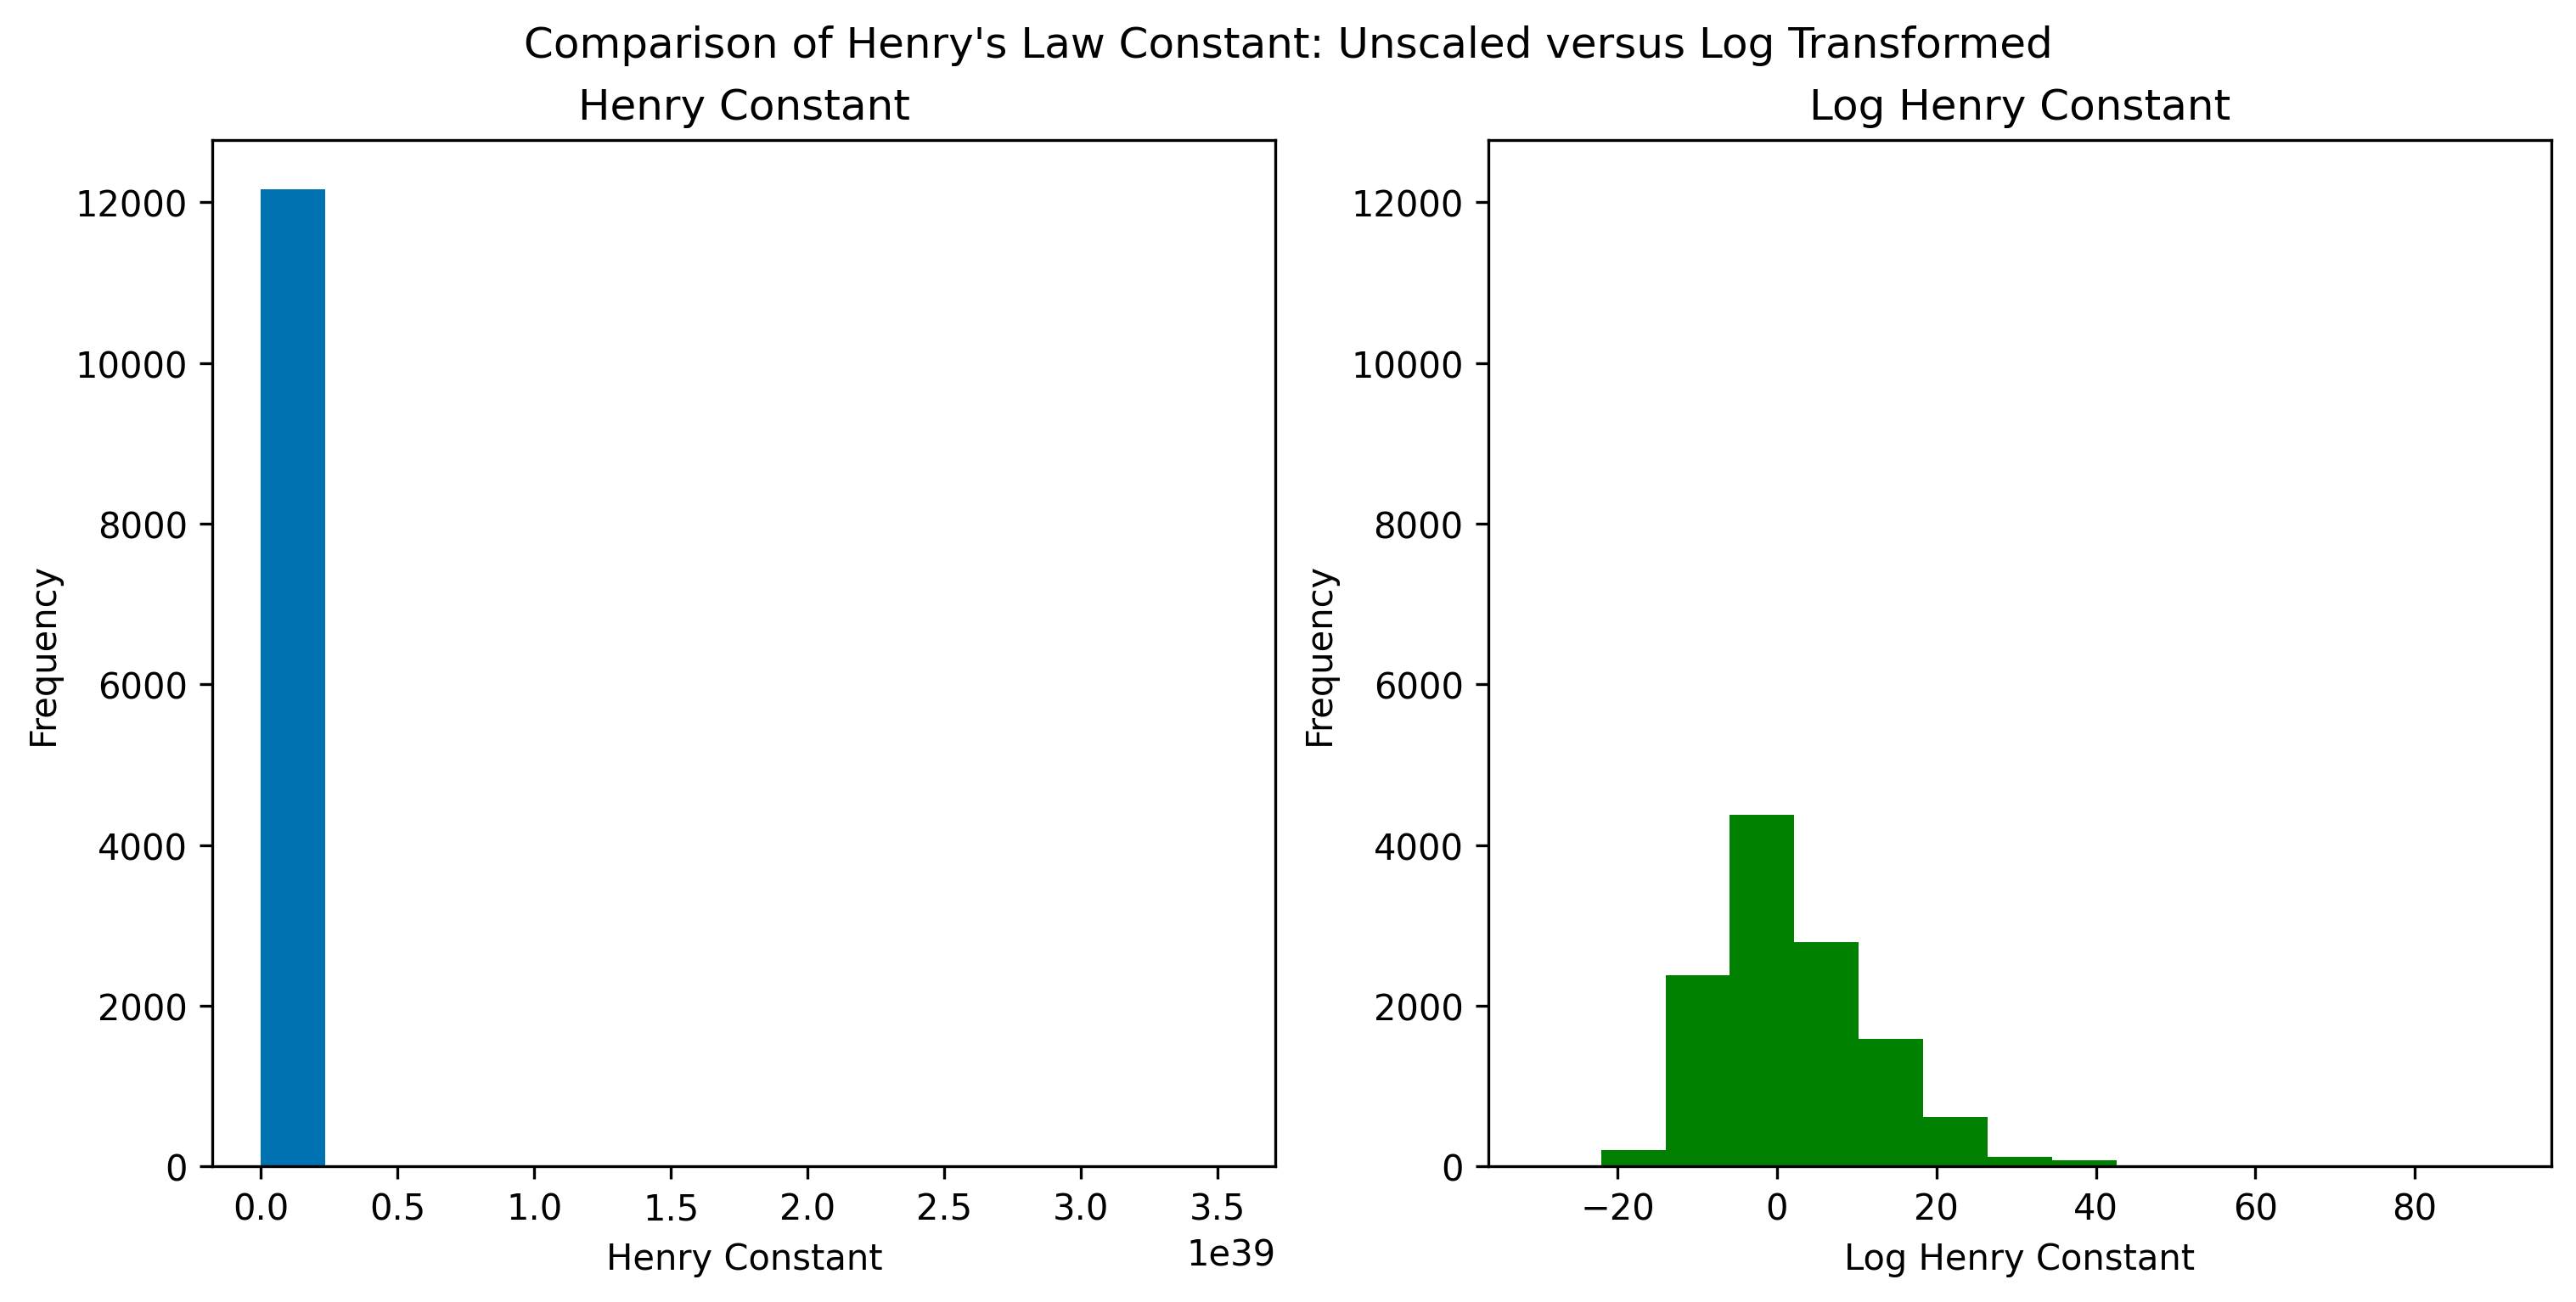

In [3]:
master = pd.read_csv("../../Data/Combined/0.5.0-Master+RDKit.csv")
df = master.copy()
df.dropna(subset=['HenryConstant'], inplace=True)
HenryConstant = df['HenryConstant'].values.astype(float)
logHL = np.log(HenryConstant)

def logH(x):
    new_x = []
    for i in x:
        try:
            new_x.append(np.log(i))
        except:
            new_x.append(np.nan)

    return new_x

# HenryConstant = [x for x in HenryConstant if x < 300]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=300, layout = "constrained")
ax1.hist(HenryConstant, label='Henry Constant', bins=15)
ax1.set_xlabel('Henry Constant')
ax1.set_ylabel('Frequency')
ax1.set_title('Henry Constant')
ax1lims = ax1.get_ylim()

ax2.sharey(ax1)
ax2.hist(logH(HenryConstant), color="green", label='Log Henry Constant', bins=15)
ax2.set_xlabel('Log Henry Constant')
ax2.set_ylabel('Frequency')
ax2.set_title('Log Henry Constant')
ax2.set_ylim(ax1lims)

plt.suptitle("Comparison of Henry's Law Constant: Unscaled versus Log Transformed")

unscaledSkew = df['HenryConstant'].skew()
scaledSkew = pd.Series(logH(HenryConstant)).skew()
print(f"Unscaled Skewness: {unscaledSkew}")
print(f"Scaled Skewness: {scaledSkew}")

In [7]:
HenryConstant = HenryConstant[HenryConstant < 1e15]
logHL = np.log(HenryConstant)
skew = pd.Series(logHL).skew()
print(f"Log Transformed Skewness: {skew}")
print(np.min(logHL) - np.max(logHL))

Log Transformed Skewness: 0.5061581927669374
-64.59016563948965


## Overfitting

In [ ]:
x = np.arange(0, 11, 0.5)
xsmooth = np.linspace(0, 10, 1000)
y = x + np.random.normal(0, 1, len(x))

bestFit = np.polyfit(x[:10], y[:10], 1)
bestFit = np.poly1d(bestFit)
 
overfit = np.polyfit(x[:10], y[:10], 4)
overfit = np.poly1d(overfit)

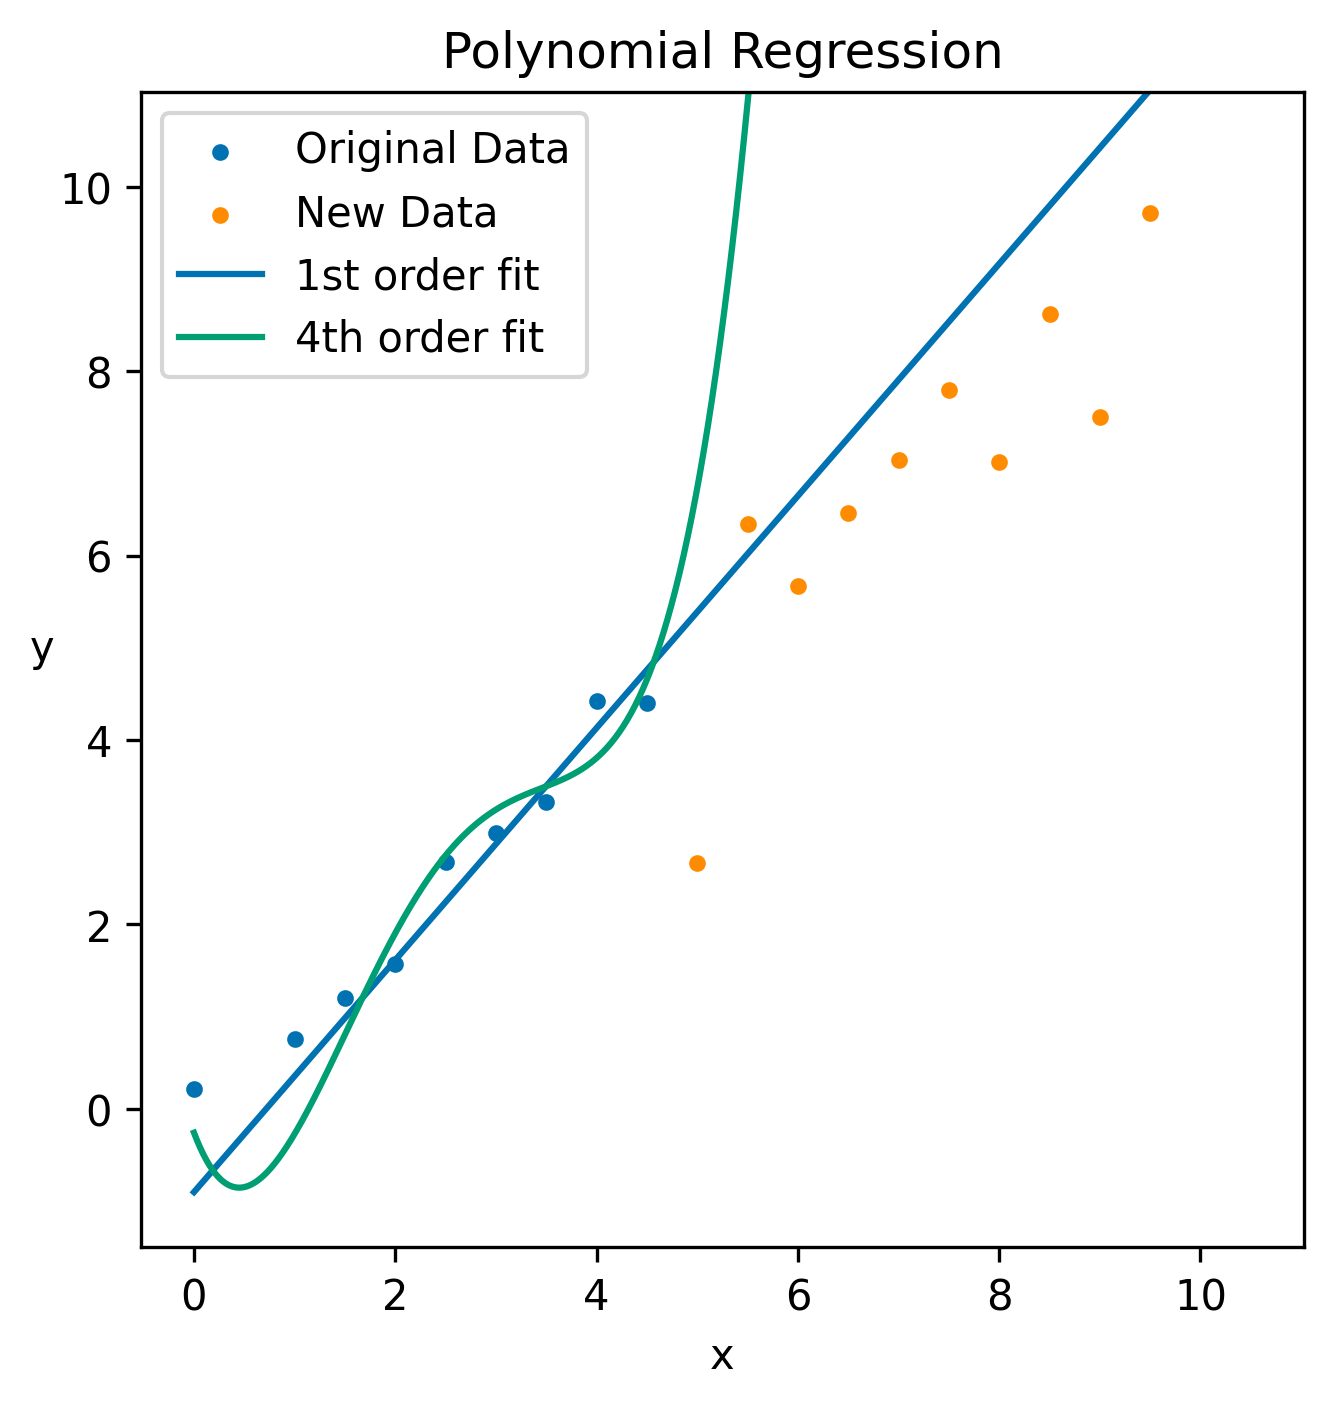

In [ ]:
plt.figure(dpi=300, figsize = (5, 5))
plt.scatter(x[:10], y[:10], label = "Original Data", marker=".")
plt.scatter(x[10:], y[10:], label = "New Data", marker=".", color="darkorange")

plt.plot(x, bestFit(x), label = "1st order fit")
plt.plot(xsmooth, overfit(xsmooth), label = "4th order fit")

xlims = plt.xlim()
plt.ylim(-1.5, xlims[1])
plt.title("Polynomial Regression")
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.legend()